# Retrieval Evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def precision(at,gt,query):
    hit = 0
    for i in range(len(query)):
        if query[i] in gt:
            hit+=1
        if i > at :
            break
    return float(hit)/at
def average_precision(gt,query):
    hit = 0
    ap = 0
    for i in range(len(query)):
        
        if query[i] in gt:
            hit+=1
            ap+=float(hit)/(i+1)
            
    return (ap/hit)
def reciprocal_rank(gt,query):
    rr = 0
    for i in range(len(query)):
        if query[i] in gt:
            rr =1.0/(i+1)
            break
    return rr

def draw_table(queries,gts,p_5,p_10,MAP,MRR):
    fig, ax = plt.subplots()

    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)

    clust_data = np.zeros((len(queries),len(queries[0])*4))

    summary=[]
    for i in range(len(queries)*2):
        summary += [p_5[i], p_10[i], MAP[i], MRR[i]]
    
    for i in range(len(queries)):
        for j in range(len(queries[i])*4):
            clust_data[i][j]=summary[((i*len(queries[i])*4)+(j))]
    

    avg_row = np.round(clust_data.mean(axis=0),3)
    clust_data = np.vstack([clust_data, avg_row])
    
    collabel=[]
    for i in range(len(queries[0])):
        label = chr(ord('A') + i)
        collabel+=["("+label+")P@5","("+label+")P@10","("+label+")MAP","("+label+")MRR",]

    rowlabel=[]
    for i in range(len(queries)):
        rowlabel.append("Q"+str(i+1))
    rowlabel.append("AVG")
    the_table = ax.table(cellText=clust_data,colLabels=collabel,rowLabels=rowlabel,loc='center')
    the_table.set_fontsize(24)
    the_table.scale(2, 2)
    plt.show()

# Usage

# Exercises for Lecture 3

<img src="images/retrieval_image.png">

In [3]:
#depends on system or alogoritm
#queries[qid][alogoID or system ID]

#TODO
queries=[
    [
        [1, 2, 4, 5, 3, 6, 9, 8, 10, 7],
        [2, 4, 3, 10, 5, 6, 7, 8, 9, 1],
    ],
    [
        [1, 2, 4, 5, 3, 9, 8, 6, 10, 7 ],
        [5, 6, 4, 1, 7, 8, 9, 10, 2],
    ],
    [
        [1, 7, 4, 5, 3, 6, 9, 8, 10, 2],
        [2, 4, 3, 7, 5, 6, 1, 8, 9, 10],
    ]
]
# gts[qid]=[....]
#TODO
gts = [
    [1,3],
    [2,4,5,6],
    [7],
]

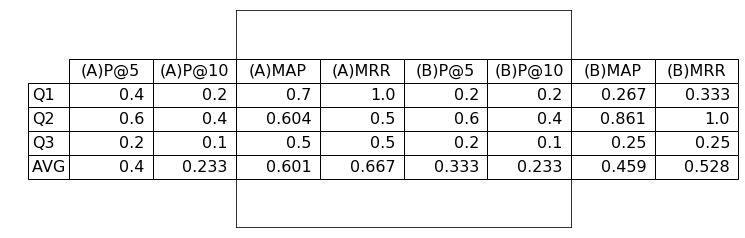

In [4]:
p_5 = []
p_10 = []
MAP = []
MRR = []

for i in range(len(queries)):
    for j, query in enumerate(queries[i]):
        p_5.append(round(precision(5,gts[i],query),3))
        p_10.append(round(precision(10,gts[i],query),3))
        MAP.append(round(average_precision(gts[i],query),3))
        MRR.append(round(reciprocal_rank(gts[i],query),3))
        

draw_table(queries,gts,p_5,p_10,MAP,MRR)

# Trial Exam Case

<img src="images/retrieval_image_trial_exam.png">

In [5]:
#depends on system or alogoritm
#queries[qid][alogoID or system ID]
#TODO
queries=[
    [
        [1,2,6,5,9,10,7,4,8,3],
        [10,9,8,7,5,4,6,2,1,3],
    ],
    [
        [1,2,4,5,7,10,8,3,9,6],
        [1,3,2,4,5,6,8,7,10,9],
    ],
]
# gts[qid]=[....]
#TODO
gts = [
    [1,4,5],
    [3,6],
]

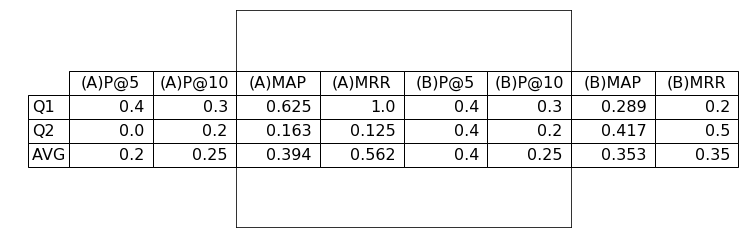

In [6]:
p_5 = []
p_10 = []
MAP = []
MRR = []

for i in range(len(queries)):
    for j, query in enumerate(queries[i]):
        p_5.append(round(precision(5,gts[i],query),3))
        p_10.append(round(precision(10,gts[i],query),3))
        MAP.append(round(average_precision(gts[i],query),3))
        MRR.append(round(reciprocal_rank(gts[i],query),3))
        

draw_table(queries,gts,p_5,p_10,MAP,MRR)